In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
df=pd.read_csv(r"D:\internship\hr dataset\HR_comma_sep (1).csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [4]:
num_df=df.select_dtypes(exclude='object')
num_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [5]:
cat_df=df.select_dtypes(include='object')

In [6]:
from sklearn.preprocessing import OrdinalEncoder
ordinalencoder=OrdinalEncoder()

In [7]:
encoded_data=ordinalencoder.fit_transform(cat_df)

In [8]:
cat_encoded_df=pd.DataFrame(encoded_data,columns=['Department','salary'])
cat_encoded_df

,Department,salary
0,7.0,1.0
1,7.0,2.0
2,7.0,2.0
3,7.0,1.0
4,7.0,1.0
...,...,...
14994,8.0,1.0
14995,8.0,1.0
14996,8.0,1.0
14997,8.0,1.0


In [9]:
df_new=pd.merge(num_df,cat_encoded_df,left_index=True,right_index=True)
df_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7.0,1.0
1,0.80,0.86,5,262,6,0,1,0,7.0,2.0
2,0.11,0.88,7,272,4,0,1,0,7.0,2.0
3,0.72,0.87,5,223,5,0,1,0,7.0,1.0
4,0.37,0.52,2,159,3,0,1,0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8.0,1.0
14995,0.37,0.48,2,160,3,0,1,0,8.0,1.0
14996,0.37,0.53,2,143,3,0,1,0,8.0,1.0
14997,0.11,0.96,6,280,4,0,1,0,8.0,1.0


In [10]:
X=df_new.drop(columns='left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7.0,1.0
1,0.80,0.86,5,262,6,0,0,7.0,2.0
2,0.11,0.88,7,272,4,0,0,7.0,2.0
3,0.72,0.87,5,223,5,0,0,7.0,1.0
4,0.37,0.52,2,159,3,0,0,7.0,1.0


<Axes: >

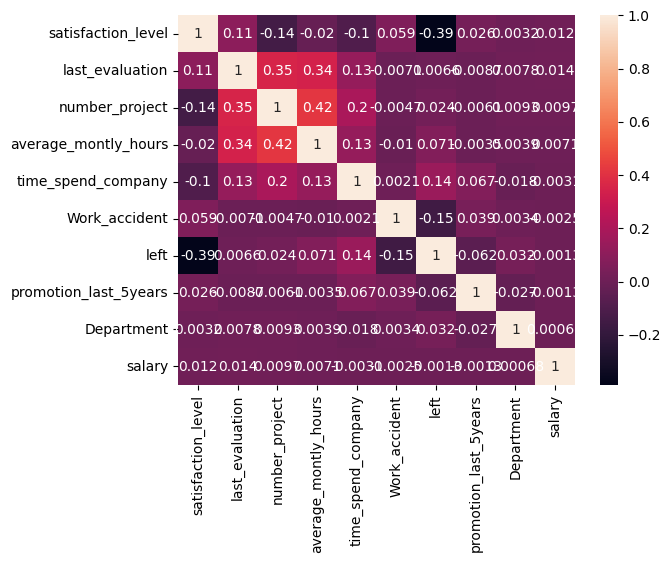

In [14]:
#Correlation analysis 
sns.heatmap(df_new.corr(),annot=True,fmt='.2g')

In [11]:
y= df_new['left']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier()

In [14]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [16]:
# score method used to calculate accuracy in classification models 
classifier.score(X_test,y_test)

0.9731313131313132

In [17]:
# print classification report 
from sklearn.metrics import classification_report
report_dict=classification_report(y_test,y_pred, output_dict=True)
report_df=pd.DataFrame(report_dict)
report_df.T

,precision,recall,f1-score,support
0,0.987399,0.977182,0.982264,3769.000000
1,0.929508,0.960203,0.944606,1181.000000
accuracy,0.973131,0.973131,0.973131,0.973131
macro avg,0.958454,0.968693,0.963435,4950.000000
weighted avg,0.973587,0.973131,0.973280,4950.000000


In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred,zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9731313131313132
Precision: 0.9295081967213115
Recall: 0.9602032176121931
F1 Score: 0.9446064139941691
Confusion Matrix:
[[3683   86]
 [  47 1134]]


In [20]:
# getting default parameters to be fine tuned
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [22]:
#finding the best ccp_alpha value

alphas = np.arange(0.0, 0.3, 0.01)  # Define a range of alpha values to try
accuracy_scores_list = []

for alpha in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_list.append(accuracy)

print(f" alpha value with their accuracy scores {accuracy_scores_list}")

 alpha value with their accuracy scores [0.9743434343434343, 0.9606060606060606, 0.9424242424242424, 0.9072727272727272, 0.9072727272727272, 0.8123232323232323, 0.8123232323232323, 0.8123232323232323, 0.8123232323232323, 0.8123232323232323, 0.8123232323232323, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414, 0.7614141414141414]


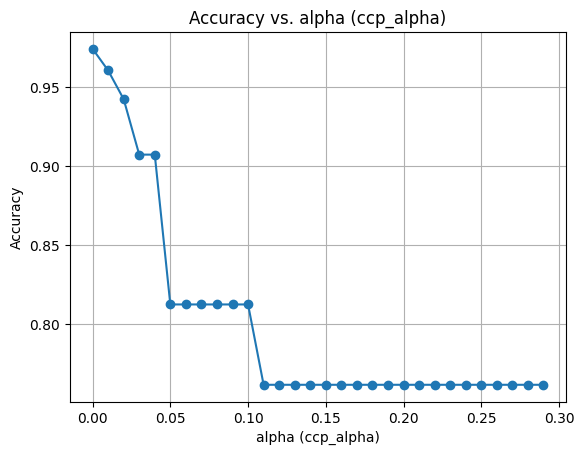

In [23]:
import matplotlib.pyplot as plt

plt.plot(alphas, accuracy_scores_list, marker='o')
plt.xlabel("alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. alpha (ccp_alpha)")
plt.grid(True)
plt.show()

In [24]:
best_alpha = alphas[np.argmax(accuracy_scores_list)]
print("Best ccp_alpha:", best_alpha)

Best ccp_alpha: 0.0


In [25]:
#finding max depth 
classifier.get_depth()

22

In [26]:
# making a parameter grid with the values we have got from previous steps and some other assumed list options 
parameter_grid= {'ccp_alpha': [0.0,0.1,0.2],
 'criterion': ['gini',"entropy"],
 'max_depth': [22],
 'max_features':["sqrt"] ,
 'max_leaf_nodes': [2],
 'min_samples_leaf':[10,40,100,200,150,120,600,1000,500],
 'min_samples_split': [2],
 'splitter': ['best']}

In [27]:
## hyperparameter tuning now
from sklearn.model_selection import GridSearchCV

gcv= GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameter_grid, scoring='accuracy' ,cv=5)
gcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2],
                         'criterion': ['gini', 'entropy'], 'max_depth': [22],
                         'max_features': ['sqrt'], 'max_leaf_nodes': [2],
                         'min_samples_leaf': [10, 40, 100, 200, 150, 120, 600,
                                              1000, 500],
                         'min_samples_split': [2], 'splitter': ['best']},
             scoring='accuracy')

In [28]:
gcv.best_params_

{'ccp_alpha': 0.1,
 'criterion': 'entropy',
 'max_depth': 22,
 'max_features': 'sqrt',
 'max_leaf_nodes': 2,
 'min_samples_leaf': 500,
 'min_samples_split': 2,
 'splitter': 'best'}

In [35]:
best_param_grid= {'ccp_alpha': [0.1],
 'criterion': ['entropy'],
 'max_depth': [22],
 'max_features': ['sqrt'],
 'max_leaf_nodes': [2],
 'min_samples_leaf': [500],
 'min_samples_split': [2],
 'splitter': ['best']}

In [36]:
## hyperparameter tuning now at cv=5
from sklearn.model_selection import GridSearchCV

gcv_new= GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=best_param_grid, scoring='accuracy',cv=10)
gcv_new.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1], 'criterion': ['entropy'],
                         'max_depth': [22], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [2], 'min_samples_leaf': [500],
                         'min_samples_split': [2], 'splitter': ['best']},
             scoring='accuracy')

In [37]:
gcv_new.best_score_

0.8004820518919347

In [38]:
y_pred_gcv_new=gcv_new.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred_gcv_new)
precision = precision_score(y_test, y_pred_gcv_new,zero_division=1)
recall = recall_score(y_test, y_pred_gcv_new, zero_division=0)
f1 = f1_score(y_test, y_pred_gcv_new,zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred_gcv_new)
#roc_auc = roc_auc_score(y_test, y_pred_prob) 

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7614141414141414
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[3769    0]
 [1181    0]]


### clearly hyperparameter tuned model is not so good against the decision tree classifier model 